# Graded Challenge 1

**Name** : Hedy Fernando <br>
**Batch** : 001-hck

# Description
### Objective
    * mengetahui negara dengan kematian terbanyak
    * mengetahui negara dengan kasus positif terbanyak
    * mengetahui penyebaran terbanyak Covid 19 berdasarkan provinsi
    * mengetahui negara dengan penanganan medis dan terkonfirmasi banyak sembuh

### Problem Statement
  Sejak Januari 2020, COVID-19 telah menjadi momok berbahaya bagi setiap negara di dunia. Setiap negara telah melaporkan jumlah kasus COVID-19 yang menyerang warganya, seperti kasus terkonfirmasi COVID-19, kematian akibat COVID-19 dan pemulihan terkonfirmasi. Melalui data yang terkumpul akan digunakan untuk mencari negara yang paling terdampak, mencari kematian terbanyak dari beberapa negara yang kasus covid 19-nya tertinggi dan mencari negara mana yang memiliki laporan sembuh terbanyak dari beberapa negara yang kasus covid 19-nya tertinggi serta di wilayah mana yang penyebarannya sangat pesat.

# Working Area

## Data Retrieval

**"Menarik data yang diperlukan untuk analisis seperti data provinsi_negara bagian diubah menjadi provinsi, negara_wilayah diubah menjadi negara, tanggal, dikonfirmasi, kematian, pulih, aktif, lintang, bujur diurutkan berdasarkan nama negara dari kueri besar GCP"**

SELECT province_state AS province, country_region AS country, date, confirmed, deaths,recovered,active, latitude, longitude FROM bigquery-public-data.covid19_jhu_csse_eu.summary
ORDER BY country ASC

# Data Loading

* import Library **pandas** yang akan digunakan memanipulasi dan visualisasi

In [1]:
import pandas as pd

* menggunakan library pandas **pd.read_csv** untuk membaca file csv

In [2]:
data = pd.read_csv('DataSet/h8dsft_P0GC1_hedy_fernando.csv')

* menampilkan data teratas dengan default 5 dengan fungsi head

In [3]:
data.head()

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.0,0.0,NaN,NaN
1,NaN,Azerbaijan,2020-02-28,1.0,0.0,0.0,NaN,NaN,NaN
2,NaN,Afghanistan,2021-08-19,152411.0,7047.0,NaN,NaN,33.93911,67.709953
3,NaN,Afghanistan,2021-09-27,155072.0,7200.0,NaN,NaN,33.93911,67.709953
4,NaN,Afghanistan,2020-05-01,2335.0,68.0,310.0,1957.0,33.93911,67.709953


* menampilkan data terbawah dengan default 5 dengan fungsi tail

In [106]:
data.tail()

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
3428873,NaN,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0,NaN,31.9522,35.2332
3428874,NaN,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0,NaN,31.9522,35.2332
3428875,NaN,occupied Palestinian territory,2020-03-17,0.0,0.0,0.0,NaN,31.9522,35.2332
3428876,NaN,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0,NaN,31.9522,35.2332
3428877,NaN,occupied Palestinian territory,2020-03-11,0.0,0.0,0.0,NaN,31.9522,35.2332


# Missing Value

* info tipe data sebelum di rubah

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428878 entries, 0 to 3428877
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   province   object 
 1   country    object 
 2   date       object 
 3   confirmed  float64
 4   deaths     float64
 5   recovered  float64
 6   active     float64
 7   latitude   float64
 8   longitude  float64
dtypes: float64(6), object(3)
memory usage: 235.4+ MB


* mengecek data kosong atau NaN dengan fungsi isnull dan sum sebagai penjumlahnya <br>
* jumlah data NaN sebelum di Data Cleaning

In [5]:
data.isnull().sum()

province      154719
country            1
date               0
confirmed         19
deaths           442
recovered    1993288
active       2001367
latitude       76335
longitude      76335
dtype: int64

* menyalin data dari variabel data dan di simpan dalam variabel baru yaitu df

In [6]:
df = data.copy()

* menjumlahkan isi value dari country

In [7]:
df['country'].value_counts()

US                     2831246
Russia                   66853
Japan                    39668
China                    29779
India                    29499
                        ...   
Republic of Korea            1
Republic of Moldova          1
Russian Federation           1
Saint Martin                 1
 Azerbaijan                  1
Name: country, Length: 250, dtype: int64

In [8]:
df['province'].astype('category')

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
3428873    NaN
3428874    NaN
3428875    NaN
3428876    NaN
3428877    NaN
Name: province, Length: 3428878, dtype: category
Categories (757, object): [' Montreal, QC', ' Norfolk County, MA', 'Abruzzo', 'Acre', ..., 'Zeeland', 'Zhejiang', 'Zhytomyr Oblast', 'Zuid-Holland']

* merubah data NaN dari kolom province dengan nilai dari kolom country

In [9]:
df['province'].fillna(df['country'], inplace = True)

In [10]:
df

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.0,0.0,NaN,NaN
1,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.0,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,NaN,NaN,33.93911,67.709953
3,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,NaN,NaN,33.93911,67.709953
4,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.0,1957.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0,NaN,31.95220,35.233200
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0,NaN,31.95220,35.233200
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.0,NaN,31.95220,35.233200
3428876,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0,NaN,31.95220,35.233200


* merubah data NaN dari kolom confirmed dengan nilai mean dari data confirmed

In [11]:
df['confirmed'].fillna(df['confirmed'].mean(),inplace = True)

In [12]:
df

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.0,0.0,NaN,NaN
1,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.0,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,NaN,NaN,33.93911,67.709953
3,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,NaN,NaN,33.93911,67.709953
4,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.0,1957.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0,NaN,31.95220,35.233200
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0,NaN,31.95220,35.233200
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.0,NaN,31.95220,35.233200
3428876,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0,NaN,31.95220,35.233200


* merubah data NaN dari kolom deaths dengan nilai mean dari data deaths

In [13]:
df['deaths'].fillna(df['deaths'].mean(), inplace = True)

In [14]:
df

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.0,0.0,NaN,NaN
1,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.0,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,NaN,NaN,33.93911,67.709953
3,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,NaN,NaN,33.93911,67.709953
4,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.0,1957.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0,NaN,31.95220,35.233200
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0,NaN,31.95220,35.233200
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.0,NaN,31.95220,35.233200
3428876,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0,NaN,31.95220,35.233200


* merubah data NaN dari kolom recovered dengan nilai mean dari data recovered

In [15]:
df['recovered'].fillna(df['recovered'].mean(), inplace = True)

In [16]:
df

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.000000,0.0,NaN,NaN
1,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.000000,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,16361.765604,NaN,33.93911,67.709953
3,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,16361.765604,NaN,33.93911,67.709953
4,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.000000,1957.0,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.000000,NaN,31.95220,35.233200
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.000000,NaN,31.95220,35.233200
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.000000,NaN,31.95220,35.233200
3428876,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.000000,NaN,31.95220,35.233200


* memanipulasi value kolom active dengan operasi matematika dengan kolom confirmed dikurang hasil jumlah kolom deaths dan recovered

In [17]:
df['active'] = df['confirmed'] - (df['deaths'] + df['recovered'])

In [18]:
df

,province,country,date,confirmed,deaths,recovered,active,latitude,longitude
0,NaN,NaN,2020-11-03,0.0,0.0,0.000000,0.000000,NaN,NaN
1,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.000000,1.000000,NaN,NaN
2,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,16361.765604,129002.234396,33.93911,67.709953
3,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,16361.765604,131510.234396,33.93911,67.709953
4,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.000000,1957.000000,33.93911,67.709953
...,...,...,...,...,...,...,...,...,...
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.000000,0.000000,31.95220,35.233200
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.000000,0.000000,31.95220,35.233200
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.000000,0.000000,31.95220,35.233200
3428876,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.000000,0.000000,31.95220,35.233200


# Manipulating Columns

* mendrop atau menghapus kolom latitude dan longitude

In [19]:
df.drop(['latitude', 'longitude'], axis = 1, inplace = True)

* menghapus baris dari kolom yang ada data NaN berdasarkan kolom Provinsi dan country

In [21]:
df.dropna(subset=['province', 'country'], inplace = True)

* memanipulasi atau merubah nama kolom

In [22]:
df.columns=['provinsi', 'negara', 'tanggal', 'positif', 'meninggal', 'sembuh', 'aktif']

In [23]:
df = df.reset_index(drop = True)

In [24]:
df

,provinsi,negara,tanggal,positif,meninggal,sembuh,aktif
0,Azerbaijan,Azerbaijan,2020-02-28,1.0,0.0,0.000000,1.000000
1,Afghanistan,Afghanistan,2021-08-19,152411.0,7047.0,16361.765604,129002.234396
2,Afghanistan,Afghanistan,2021-09-27,155072.0,7200.0,16361.765604,131510.234396
3,Afghanistan,Afghanistan,2020-05-01,2335.0,68.0,310.000000,1957.000000
4,Afghanistan,Afghanistan,2021-03-19,56069.0,2462.0,49681.000000,3926.000000
...,...,...,...,...,...,...,...
3428872,occupied Palestinian territory,occupied Palestinian territory,2020-03-15,0.0,0.0,0.000000,0.000000
3428873,occupied Palestinian territory,occupied Palestinian territory,2020-03-12,0.0,0.0,0.000000,0.000000
3428874,occupied Palestinian territory,occupied Palestinian territory,2020-03-17,0.0,0.0,0.000000,0.000000
3428875,occupied Palestinian territory,occupied Palestinian territory,2020-03-14,0.0,0.0,0.000000,0.000000


* penggunaal isnull untuk mengetahui data yang kosong dan dijumlahkan totalnya dengan sum <br>
* dipanggil untuk mengetahui sudah tidak ada lagi data kosong atay NaN

In [25]:
df.isnull().sum()

provinsi     0
negara       0
tanggal      0
positif      0
meninggal    0
sembuh       0
aktif        0
dtype: int64

# Merubah Tipe Data

* merubah tipe data dari semua kolom yaitu tipe category, datetime dan int

In [27]:
df['provinsi'] = df['provinsi'].astype('category')
df['negara'] = df['negara'].astype('category')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['positif'] = df['positif'].astype('int')
df['meninggal'] = df['meninggal'].astype('int')
df['sembuh'] = df['sembuh'].astype('int')
df['aktif'] = df['aktif'].astype('int')

* perintah untuk mengetahui kolom,index dan tipe data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428877 entries, 0 to 3428876
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   provinsi   category      
 1   negara     category      
 2   tanggal    datetime64[ns]
 3   positif    int64         
 4   meninggal  int64         
 5   sembuh     int64         
 6   aktif      int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 143.9 MB


# Data Query

* pembuatan query dengan data aktif lebih besar dari 0

In [30]:
df.query("aktif > 0")

,provinsi,negara,tanggal,positif,meninggal,sembuh,aktif
0,Azerbaijan,Azerbaijan,2020-02-28,1,0,0,1
1,Afghanistan,Afghanistan,2021-08-19,152411,7047,16361,129002
2,Afghanistan,Afghanistan,2021-09-27,155072,7200,16361,131510
3,Afghanistan,Afghanistan,2020-05-01,2335,68,310,1957
4,Afghanistan,Afghanistan,2021-03-19,56069,2462,49681,3926
...,...,...,...,...,...,...,...
3428866,Zimbabwe,Zimbabwe,2021-08-02,110855,3635,79420,27800
3428867,Zimbabwe,Zimbabwe,2022-01-17,226460,5258,16361,204840
3428868,Zimbabwe,Zimbabwe,2022-04-13,247094,5460,16361,225272
3428869,Zimbabwe,Zimbabwe,2020-07-24,2296,32,514,1750


* pembuatan query dengan kondisi negara US dengan nilai positif lebih dari 1 juta

In [49]:
df.query("negara == 'US' and positif > 1000000")

,provinsi,negara,tanggal,positif,meninggal,sembuh,aktif
552589,California,US,2021-08-19,1362848,25002,16361,1321484
555866,California,US,2021-09-27,1455155,26035,16361,1412758
562065,California,US,2021-03-19,1213288,22722,16361,1174204
565239,Arizona,US,2022-05-07,1279872,17305,16361,1246205
565343,California,US,2022-05-07,2888408,31991,16361,2840055
...,...,...,...,...,...,...,...
3376555,California,US,2022-04-13,2848030,31830,16361,2799838
3376720,Florida,US,2022-04-13,1189146,10800,16361,1161984
3376975,Illinois,US,2022-04-13,1138244,14290,16361,1107592
3379110,Texas,US,2022-04-13,1020143,10910,16361,992871


* pembuatan query dengan method query untuk menampilkan negara dengan kondisi tertentu

In [60]:
df.query("tanggal > '2020-12-30' and positif > 100000 and sembuh > 100000 \
and meninggal >= 2000 and meninggal <= 3000")

,provinsi,negara,tanggal,positif,meninggal,sembuh,aktif
908,Albania,Albania,2021-04-27,130736,2383,107163,21190
918,Albania,Albania,2021-08-04,133310,2457,130314,539
923,Albania,Albania,2021-05-07,131577,2408,115253,13916
925,Albania,Albania,2021-07-23,132828,2456,130118,254
927,Albania,Albania,2021-06-15,132469,2454,129879,136
...,...,...,...,...,...,...,...
3427926,Zambia,Zambia,2021-07-04,164282,2443,143128,18711
3427941,Zambia,Zambia,2021-06-28,149661,2091,126441,21129
3427966,Zambia,Zambia,2021-07-10,174789,2775,157489,14525
3427973,Zambia,Zambia,2021-07-09,172405,2736,154776,14893


# Grouping and Aggregating

* membuat grup data dengan group by dengan parameter aktif yang dijumlahkan totalnya dengan sum di group berdasarkan negara

In [62]:
grup_negara = df.groupby('negara')['aktif'].sum().sort_values(ascending=False)
grup_negara

negara
India               14508940562
Brazil               9861168965
France               8019566080
United Kingdom       6888452632
Germany              5445581214
                       ...     
Diamond Princess       -5844849
Micronesia             -6008381
Holy See               -6105285
Marshall Islands       -6112455
MS Zaandam             -6114666
Name: aktif, Length: 250, dtype: int64

* membuat grup data dengan group by dengan parameter meninggal di group berdasarkan negara

In [76]:
grup_meninggal = df.groupby(['negara'])['meninggal'].sum().sort_values(ascending=False)
grup_meninggal

negara
US                                489010949
Brazil                            344367838
India                             254708329
Mexico                            172266352
Russia                            141304052
                                    ...    
Reunion                                   0
Russian Federation                        0
Saint Barthelemy                          0
Saint Martin                              0
occupied Palestinian territory            0
Name: meninggal, Length: 250, dtype: int64

* membuat grup data dengan group by dengan aggregat min, median, dan max dengan data sembuh dan di grup berdasarkan negara

In [74]:
grup_aggregat = df.groupby('negara').agg(min =('sembuh','min'), 
                                                      median = ('sembuh','median'),
                                                      max = ('sembuh','max'))
grup_aggregat

,min,median,max
negara,,,
Azerbaijan,0,0.0,0
Afghanistan,0,16361.0,82586
Albania,0,16361.0,130314
Algeria,0,16361.0,118409
Andorra,0,13234.0,16361
...,...,...,...
Winter Olympics 2022,0,16361.0,16361
Yemen,0,3712.0,16361
Zambia,0,16361.0,189658


* membuat grup data dengan group by dengan parameter aktif di group berdasarkan tanggal dan provinsi

In [83]:
grup_aktif_tanggal = df.groupby(['tanggal','provinsi'])['aktif'].count().sort_values(ascending=False)
grup_aktif_tanggal

tanggal     provinsi                      
2022-03-05  Texas                             255
2022-06-13  Texas                             255
2022-07-07  Texas                             255
2022-03-04  Texas                             255
2020-08-26  Texas                             255
                                             ... 
2021-01-15  Cook Islands                        0
            Cook County, IL                     0
            Contra Costa County, CA             0
            Colombia                            0
2022-08-13  occupied Palestinian territory      0
Name: aktif, Length: 906015, dtype: int64

# Pandas Visualization

* membuat visualisai dalam bentuk bar dengan parameter yang meninggal dari setiap negara dan di urutkan dari yang tertinggi dan di batasi 10 data

<AxesSubplot:xlabel='negara'>

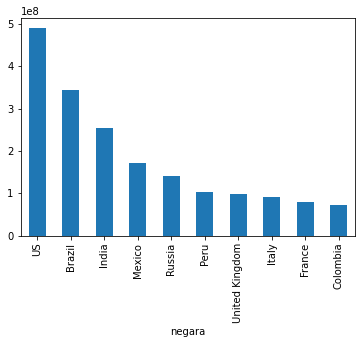

In [101]:
df.groupby(['negara'])['meninggal'].sum().sort_values(ascending=False)[0:10].plot(kind='bar')

* membuat visualisasi pie dengan parameter orang positif aktif di setiap negara dengan group by dan di urutkan dari yang tertinggi dan di batasi 10 data

<AxesSubplot:ylabel='aktif'>

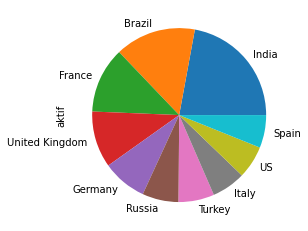

In [96]:
df.groupby('negara')['aktif'].sum().sort_values(ascending=False)[0:10].plot(kind='pie')

* membuat visualisai dalam bentuk pie berdasarkan parameter kesembuhan di grup dengan negara sebagai index dan di urutkan dari yang tertinggi dan di batasi 10 data

<AxesSubplot:ylabel='sembuh'>

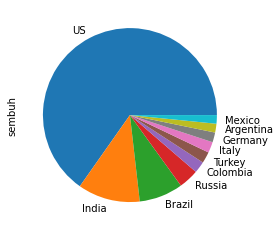

In [104]:
df.groupby('negara')['sembuh'].sum().sort_values(ascending=False)[0:10].plot(kind='pie')

* membuat visual berdasarkan area dengan parameter orang aktif tertular dengan group tanggal dan provinsi

<AxesSubplot:xlabel='tanggal,provinsi'>

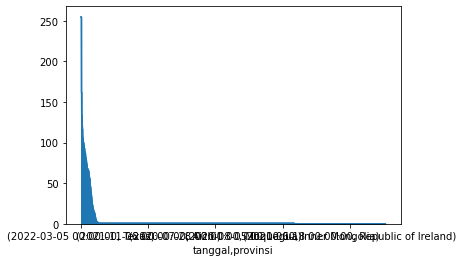

In [103]:
df.groupby(['tanggal','provinsi'])['aktif'].count().sort_values(ascending=False).plot(kind='area')

# Conclusions, Assumptions, Overall Analysis

* Berdasarkan data yang sudah di olah diketahui bahwa US menyumbang kematian terbanyak karesa Covid 19 disusul oleh Brazil dan India. <br>
* Tetapi India telah diketahui masih yang terbanyak untuk warganya yang positif Covid 19 <br>
* Berdasarkan tingkat penyebaran berdasarkan tahun, dari 2020 hingga 2022 provinsi yang didapatkan masih aktif orang tertular Covid 19 yaitu di wilayah Texas <br>
* Berdasarkan orang sembuh, Amerika cukup baik dalam penanganan penyembuhan walaupun penyebaran dan kematian tetap lebih banyak